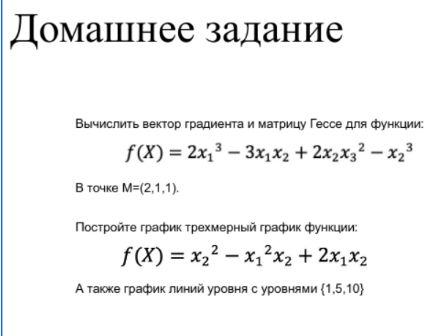

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

##Задание 1

In [2]:
x1, x2, x3 = sym.symbols('x1 x2 x3')
f = 2*x1**3-3*x1*x2+2*x2*x3**2-x2**3
M = {x1:2, x2:1, x3:1}
grad = [
        sym.diff(f, x1, 1).subs(M),
        sym.diff(f, x2, 1).subs(M),
        sym.diff(f, x3, 1).subs(M),
        ]
print('Значение градиента', grad)

Значение градиента [21, -7, 4]


In [3]:
grad = [
        sym.diff(f, x1, 1),
        sym.diff(f, x2, 1),
        sym.diff(f, x3, 1),
        ]
grad

[6*x1**2 - 3*x2, -3*x1 - 3*x2**2 + 2*x3**2, 4*x2*x3]

In [4]:
hess_el = []
var = [x1, x2, x3]
for i in grad:
    for j in var:
        hess_el.append(sym.diff(i, j))
hess_el

[12*x1, -3, 0, -3, -6*x2, 4*x3, 0, 4*x3, 4*x2]

In [5]:
res = []
for el in hess_el:
    res.append(el.subs(M))
print('Значение матрицы Гесса:\n', np.array(res).reshape(len(var), len(var)))

Значение матрицы Гесса:
 [[24 -3 0]
 [-3 -6 4]
 [0 4 4]]


##Задание 2

In [6]:
def func(x1, x2):
    return x2**2-x1**2*x2+2*x1*x2

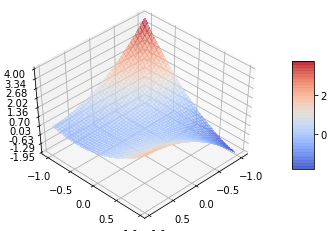

In [7]:
# https://matplotlib.org/stable/gallery/mplot3d/surface3d.html
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-1, 1, 0.05)
Y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(X, Y)
Z = func(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=10, antialiased=False, alpha=0.5)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.azim=45
ax.dist=10
ax.elev=45

plt.show()

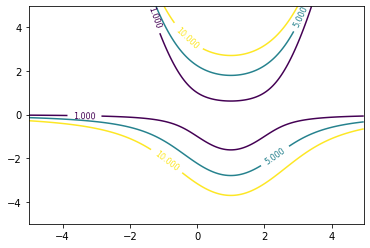

In [8]:
levels = [1, 5, 10]

X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(X, Y)
Z = func(X, Y)

fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z, levels)
ax.clabel(cs, inline=True, fontsize = 8)
plt.show()